In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Datasets/IMDB Dataset.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.shape

(50000, 2)

In [5]:
## Lets analysis the data using the seaborn libarary and matplotlib see the category of the label

In [6]:
data["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Category distribution over the label')

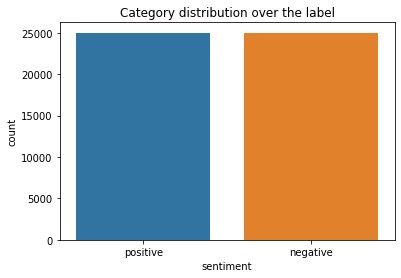

In [9]:
sns.countplot(data["sentiment"])
plt.title("Category distribution over the label")

In [10]:
#now see the distribution using the piechart 

In [13]:
label=data["sentiment"].value_counts().index
values=data["sentiment"].value_counts().values
values

array([25000, 25000])

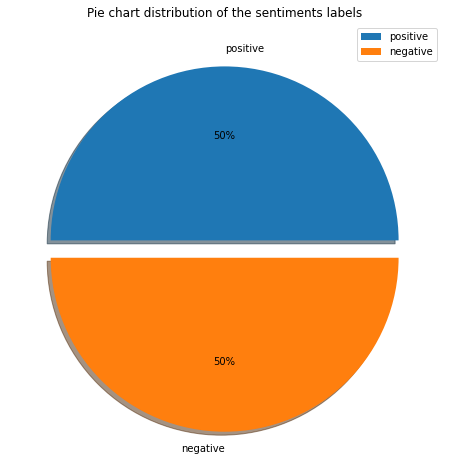

In [24]:
plt.figure(figsize=(8,8))
plt.title("Pie chart distribution of the sentiments labels")
plt.pie(values,labels=label,shadow=True,explode=[0,0.1],autopct="%0.f%%")
plt.legend()
plt.show()

In [21]:
## now the text preprocessing comes into the role

In [25]:
import re 
import nltk
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
ps=PorterStemmer()
stops=set(stopwords.words("english"))

In [28]:
def preprocessing(x):
  text=re.sub("[^a-zA-Z0-9]"," ",x)
  text=text.lower()
  text=text.split()
  text=[ps.stem(word) for word in text if word not in stops]
  text=" ".join(text)
  return text


In [29]:
preprocessing("Hey my name is sanju and My email is iamsanju0707@gmail.com")

'hey name sanju email iamsanju0707 gmail com'

In [30]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [31]:
data["review"]=data["review"].apply(preprocessing)

In [32]:
data.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,positive
1,wonder littl product br br film techniqu unass...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [48]:
data["review"][0]

'one review mention watch 1 oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch 

In [34]:
len(data["review"])

50000

In [36]:
# from tqdm import tqdm
# for i in tqdm(range(len(data["review"]))):
#   print(i)

In [37]:
## Now make the corpus using the dataframe columns for the word2vec model training

In [44]:
corpus=[list(i.split()) for i in data["review"]]


In [45]:
corpus

[['one',
  'review',
  'mention',
  'watch',
  '1',
  'oz',
  'episod',
  'hook',
  'right',
  'exactli',
  'happen',
  'br',
  'br',
  'first',
  'thing',
  'struck',
  'oz',
  'brutal',
  'unflinch',
  'scene',
  'violenc',
  'set',
  'right',
  'word',
  'go',
  'trust',
  'show',
  'faint',
  'heart',
  'timid',
  'show',
  'pull',
  'punch',
  'regard',
  'drug',
  'sex',
  'violenc',
  'hardcor',
  'classic',
  'use',
  'word',
  'br',
  'br',
  'call',
  'oz',
  'nicknam',
  'given',
  'oswald',
  'maximum',
  'secur',
  'state',
  'penitentari',
  'focus',
  'mainli',
  'emerald',
  'citi',
  'experiment',
  'section',
  'prison',
  'cell',
  'glass',
  'front',
  'face',
  'inward',
  'privaci',
  'high',
  'agenda',
  'em',
  'citi',
  'home',
  'mani',
  'aryan',
  'muslim',
  'gangsta',
  'latino',
  'christian',
  'italian',
  'irish',
  'scuffl',
  'death',
  'stare',
  'dodgi',
  'deal',
  'shadi',
  'agreement',
  'never',
  'far',
  'away',
  'br',
  'br',
  'would',
 

In [46]:
len(corpus)

50000

In [47]:
corpus[0]

['one',
 'review',
 'mention',
 'watch',
 '1',
 'oz',
 'episod',
 'hook',
 'right',
 'exactli',
 'happen',
 'br',
 'br',
 'first',
 'thing',
 'struck',
 'oz',
 'brutal',
 'unflinch',
 'scene',
 'violenc',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'heart',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violenc',
 'hardcor',
 'classic',
 'use',
 'word',
 'br',
 'br',
 'call',
 'oz',
 'nicknam',
 'given',
 'oswald',
 'maximum',
 'secur',
 'state',
 'penitentari',
 'focus',
 'mainli',
 'emerald',
 'citi',
 'experiment',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inward',
 'privaci',
 'high',
 'agenda',
 'em',
 'citi',
 'home',
 'mani',
 'aryan',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffl',
 'death',
 'stare',
 'dodgi',
 'deal',
 'shadi',
 'agreement',
 'never',
 'far',
 'away',
 'br',
 'br',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goe',
 'show',
 'dare',
 'forget',
 

In [49]:
#import Word2Vec using gensim
from gensim.models import Word2Vec

In [50]:
w2v_model=Word2Vec(corpus,window=5,min_alpha=0.001,min_count=1,size=100)

In [51]:
w2v_model.most_similar("focus")

<ipython-input-51-daa93cf8dd70>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  w2v_model.most_similar("focus")


[('concentr', 0.7385011315345764),
 ('focu', 0.6754377484321594),
 ('evolv', 0.6730644702911377),
 ('intertwin', 0.6645505428314209),
 ('arc', 0.637451171875),
 ('interwoven', 0.6192188262939453),
 ('concern', 0.6060390472412109),
 ('explor', 0.5956592559814453),
 ('weav', 0.5909830927848816),
 ('centr', 0.5858479738235474)]

In [52]:
vocab=w2v_model.wv.vocab
vocab

{'one': <gensim.models.keyedvectors.Vocab at 0x7f86fbb32ac0>,
 'review': <gensim.models.keyedvectors.Vocab at 0x7f86fbb32940>,
 'mention': <gensim.models.keyedvectors.Vocab at 0x7f86fbb322b0>,
 'watch': <gensim.models.keyedvectors.Vocab at 0x7f86fbb32dc0>,
 '1': <gensim.models.keyedvectors.Vocab at 0x7f86fbb32b80>,
 'oz': <gensim.models.keyedvectors.Vocab at 0x7f86fbb325e0>,
 'episod': <gensim.models.keyedvectors.Vocab at 0x7f86fbb320d0>,
 'hook': <gensim.models.keyedvectors.Vocab at 0x7f86fbb329d0>,
 'right': <gensim.models.keyedvectors.Vocab at 0x7f86fbb32d30>,
 'exactli': <gensim.models.keyedvectors.Vocab at 0x7f86fbb32490>,
 'happen': <gensim.models.keyedvectors.Vocab at 0x7f86fbb327f0>,
 'br': <gensim.models.keyedvectors.Vocab at 0x7f86fbb328e0>,
 'first': <gensim.models.keyedvectors.Vocab at 0x7f86fbb329a0>,
 'thing': <gensim.models.keyedvectors.Vocab at 0x7f86fbb32d00>,
 'struck': <gensim.models.keyedvectors.Vocab at 0x7f86fbb32280>,
 'brutal': <gensim.models.keyedvectors.Vocab 

In [53]:
len(vocab)

70762

In [54]:
w2v_model.wv["girl"]

array([ 1.57822931e+00,  1.04117656e+00,  2.23988771e+00, -4.18974787e-01,
        2.01560807e+00,  2.25871176e-01, -1.69781721e+00,  2.30454922e+00,
       -2.70613551e+00, -7.40564525e-01, -1.82420218e+00,  2.43136001e+00,
        6.19620144e-01, -3.90658408e-01,  3.40264529e-01,  6.93757594e-01,
       -5.16789019e-01, -9.75667179e-01,  4.18335438e+00,  3.87278616e-01,
        1.88763165e+00,  2.99320674e+00, -9.34284091e-01,  2.06291842e+00,
        2.79590756e-01,  3.00718933e-01,  1.75397009e-01,  1.59060526e+00,
       -5.09356558e-01, -5.42538881e-01,  1.53868699e+00, -4.98109341e-01,
        4.70105529e-01, -5.26083171e-01, -1.47628641e+00, -1.01112199e+00,
        1.53949594e+00,  3.40978026e-01,  9.00788486e-01, -9.43615913e-01,
        7.15775073e-01, -9.12347376e-01, -2.98377097e-01,  2.93140864e+00,
        3.78046274e-01,  1.42937139e-01,  2.06830218e-01, -8.37541342e-01,
       -1.25258863e+00,  3.79292750e+00, -1.01678586e+00,  5.04063070e-01,
        1.39817846e+00, -

In [55]:
len(w2v_model["girl"])

<ipython-input-55-4c19dc4529b7>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  len(w2v_model["girl"])


100

In [56]:
## now time to word embedding using the w2v_model

In [86]:
def avg_vec(docs):
  vec=[w2v_model.wv[i] for i in docs if i in vocab]
  return np.mean(vec,axis=0)

In [87]:
c=[["girl","focus","cute"],["more","linn"]]
for i in c:
  print(avg_vec(i))

[ 1.2668695   0.99941355  0.5969762   0.14759573  0.7182145   0.95095444
 -0.90437675  1.2814327  -1.6899904  -0.16918023 -0.42677596  0.76797414
  0.09513719 -0.48196518 -0.7126458   0.674155   -0.71816283 -0.34340754
  1.4525772   0.50839776  1.2837824   1.5000182   0.24805577  1.2015837
 -0.2748836   0.10048453  0.12775765  0.14106716  0.23343621  0.41131985
  0.8135898  -0.91060954  0.6499194  -0.19069757 -0.7633745  -0.33564886
  0.3983724  -0.6401711   0.4947064  -0.16986243  0.9059866  -0.60820675
 -0.02419068  1.0135603   0.73483634  0.7453852  -0.9147815  -0.15673828
 -0.56729394  0.9994981  -0.470235    0.7426285   1.5766732   0.02718542
  0.4114859  -0.93488294 -0.65731305 -0.21369225  2.1703317   0.678569
  0.5789956   0.79791003 -0.32569483  0.52116555 -0.6084634  -0.26213178
  0.20144506  0.09091004 -0.15355287  0.25886026  0.16411407  0.47468567
  0.91211957 -0.0182445   0.5041022  -0.33992252 -0.15158087  0.08381653
 -1.0147443  -0.9259054   0.29336607  0.16933937 -0.51

In [88]:
x=[]
for i in tqdm(range(len(corpus))):
  vec=avg_vec(corpus[i])
  x.append(vec)

100%|██████████| 50000/50000 [00:12<00:00, 4000.95it/s]


In [89]:
len(x)

50000

In [90]:
x[0]

array([-2.59171277e-01,  2.02274621e-01, -1.54252023e-01,  9.41049159e-02,
       -1.89316019e-01, -3.18362683e-01, -7.05573916e-01,  1.50996804e-01,
       -5.98836899e-01,  1.41390994e-01, -1.65857840e-02,  4.75247979e-01,
        3.90781432e-01,  3.83081287e-01, -3.51891994e-01,  5.43562233e-01,
       -3.22090298e-01,  4.14153486e-02,  5.06780922e-01, -5.85755289e-01,
        2.67370790e-01, -2.27896363e-01,  2.12917283e-01, -3.21830511e-01,
        1.71853572e-01,  2.46496927e-02, -1.54249072e-01, -1.61328539e-01,
       -2.45249733e-01, -3.73986997e-02,  4.62743361e-03, -4.72984076e-01,
        1.82045490e-01,  1.62690669e-01, -4.33005154e-01, -2.06671000e-01,
        2.64768511e-01, -1.45797700e-01, -2.40608513e-01, -1.76753923e-01,
        2.33255193e-01, -3.98608148e-02, -1.55992031e-01,  1.85809314e-01,
       -4.04089063e-01, -4.96547669e-01, -7.02740029e-02, -1.29264697e-01,
       -2.49102548e-01,  9.10177454e-02, -1.84288368e-01,  2.95735389e-01,
        3.66373032e-01, -

In [92]:

y=np.where(data["sentiment"]=="positive",1,0)
y=np.array(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [93]:
## now this time to train_test_split
from sklearn.model_selection import train_test_split

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [95]:
## now the train and test is ready we need to just give model
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [97]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0])

In [98]:
model.score(x_train,y_train)

0.7680597014925373

In [99]:
model.score(x_test,y_test)

0.7679393939393939

In [100]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier()

In [102]:
y_pred1=classifier.predict(x_test)

In [103]:
classifier.score(x_train,y_train)

0.8704477611940299

In [104]:
classifier.score(x_test,y_test)

0.801939393939394

In [105]:
## as here we can see the accuracy is increase in knn but some overfitting is also there.
#so we have to hpyertune every model

In [106]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      7971
           1       0.78      0.76      0.77      8529

    accuracy                           0.77     16500
   macro avg       0.77      0.77      0.77     16500
weighted avg       0.77      0.77      0.77     16500



In [109]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      8488
           1       0.79      0.81      0.80      8012

    accuracy                           0.80     16500
   macro avg       0.80      0.80      0.80     16500
weighted avg       0.80      0.80      0.80     16500

